In [ ]:
#Mounting the Google Drive to Google Colab to access the files directly from the Google Drive.
from google.colab import drive
drive.mount('/content/drive')
#The code is referred from https://colab.research.google.com/notebooks/io.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the Tensorflow 
import tensorflow as tf

#The following command gives the output as the name of the GPU device. If the GPU device is not available then it outputs an empty string.
tf.test.gpu_device_name()

#The above code is referenced from
#https://www.tensorflow.org/api_docs/python/tf/test/gpu_device_name
#https://www.tensorflow.org/install/pip

''

In [ ]:
#PIP installer stands for "Preferred Installer Program"
#Installing the vaderSentiment and Pandas

!pip install vaderSentiment
!pip install pandas 1.3.5

#The above code has been referred from
#https://pypi.org/project/vaderSentiment/
#https://pandas.pydata.org/docs/getting_started/install.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement 1.3.5 (from versions: none)
ERROR: No matching distribution found for 1.3.5


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import numpy as np
import pandas as pd
from pandas import DataFrame
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud, STOPWORDS

% matplotlib inline
import nltk
nltk.download('stopwords')



#Importing the necessary packages and libraries
#The above code was referred from
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#https://textblob.readthedocs.io/en/dev/
#https://www.nltk.org/py-modindex.html
#https://scikit-learn.org/stable/modules/naive_bayes.html#
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#examples-using-sklearn-linear-model-logisticregression
#https://scikit-learn.org/stable/modules/model_evaluation.html

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def return_dict(file):
  yield eval(file)

def parse(path):
  g = gzip.open(path, 'rb')
  return map(return_dict, g)
  """
  for l in g:
    yield eval(l)

  """
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


#paths
baby_path = "/content/drive/My Drive/Amazon_Review_recommendation/Baby_5.json"

#meta data
babyMetaPath = "/content/drive/My Drive/Amazon_Review_recommendation/meta_Baby.json"

In [ ]:
#----Reading Baby data from JSON files and displaying the total data

Baby = pd.read_json(baby_path, lines=True)
#print('-> Total reviews : ',Baby.reviewText.count())
#print("Data Loading completed in ")

#--- The above code was referred from
#https://sparkbyexamples.com/pandas/pandas-read-json-with-examples/

In [ ]:
#--- Uncomment to display the data
#Baby.head()

In [ ]:
#--- Opening the json file in read mode and displaying the contents
import json
import ast
with open('/content/drive/My Drive/Amazon_Review_recommendation/meta_Baby.json', 'r') as f:
  df = pd.DataFrame([ast.literal_eval(l) for l in f.readlines()])
#--- Uncomment to display the dataframe
#print(df)

In [ ]:
baby_meta = df

#--- Uncomment to display the dataframe
#baby_meta

In [ ]:
#--- Removing 'imUrl' as we are not using it for any purpose(Those are basically for images)
#--- Data providing information about the data is called Metadata 

baby_meta = baby_meta[['asin','description','categories','title','price','salesRank','related','brand']]

#--- Uncomment to display the dataframe
#baby_meta.head()

In [ ]:
#--- Uncomment to display the dataframe
#Baby.info()

In [ ]:
Baby['year'] = pd.DatetimeIndex(Baby['reviewTime']).year
Baby['month'] = pd.DatetimeIndex(Baby['reviewTime']).month

In [ ]:
#--- Exploratory Data Analysis and Data Visualisation 
f, axes = plt.subplots(2,2, figsize=(12,8))
#--- Yearly Reviews
yearly = Beauty.groupby(['year'])['reviewerID'].count().reset_index()
yearly = yearly.rename(columns={'reviewerID':'no_of_reviews'})
yearChart = sns.lineplot(x='year',y='no_of_reviews',data=yearly, ax = axes[0,0])
yearChart.set_title('No of reviews over years')

#--- Monthly Reviews
monthly = Beauty.groupby(['month'])['reviewerID'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'reviewerID':'no_of_reviews'})
monthChart = sns.barplot(x='month',y='no_of_reviews',data=monthly, ax = axes[0,1])
monthChart.set_title('No of reviews over month')
monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

#--- Getting overall ratings for every beauty products
#Beauty['overall'].value_counts().plot(kind='bar')
sns.countplot(x = 'overall', data = Beauty, ax = axes[1,0] ).set_title('Overall Reviews')

#--- helpfulness of review.
helpfulness = Beauty[['helpful','asin']]
helpfulness[['helpfulVotes','totalVotes']] = pd.DataFrame(helpfulness.helpful.values.tolist(), index=helpfulness.index)
helpfulness = helpfulness.drop(['helpful'], axis = 1)
#--- calculating helpfulness Percentage
helpfulness['percentage'] = (helpfulness.helpfulVotes/helpfulness.totalVotes)*100
helpfulness = helpfulness.fillna(0)
final_helpfullness = helpfulness.groupby(pd.cut(helpfulness.percentage,np.arange(0,101,10))).count()
final_helpfullness = final_helpfullness.rename(columns={'percentage':'count'})
final_helpfullness = final_helpfullness.reset_index()
helpfullnessChart = sns.barplot(x='percentage',y='count',data=final_helpfullness, ax = axes[1,1])
helpfullnessChart.set_title('helpfullness of reviews ranked by percentage')
helpfullnessChart.set_xticklabels(helpfullnessChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()
#--- The above code is referred from
#https://www.w3resource.com/pandas/dataframe/dataframe-head.php

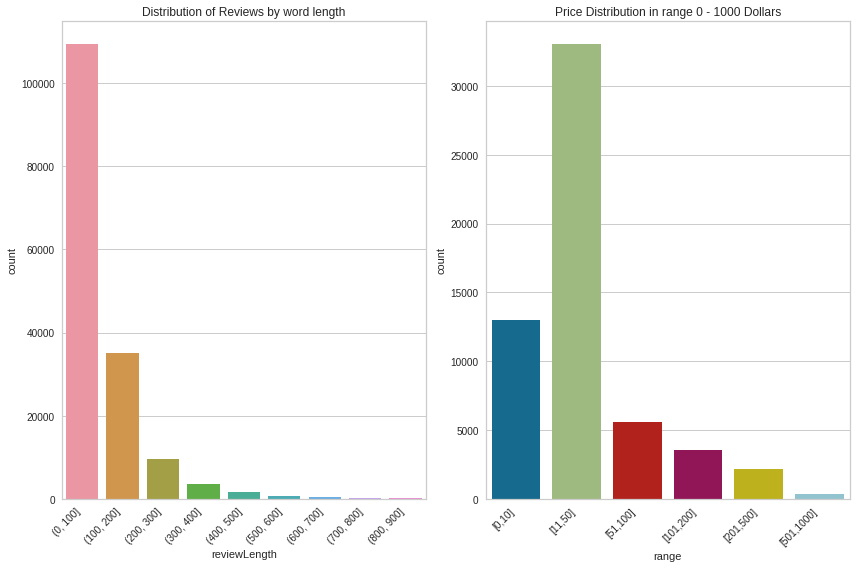

In [ ]:

f, axes = plt.subplots(1,2, figsize=(12,8))
#---- Distribution of word reviews by length
Baby_reviews = Baby[['asin','reviewerID','reviewerName','reviewText','summary','overall']]
Baby_reviews['reviewLength'] = Baby_reviews['reviewText'].apply(lambda x: len(x.split()))
#Baby_reviews.head()
reviews_word_length = Baby_reviews.groupby(pd.cut(Baby_reviews.reviewLength, np.arange(0,1000,100))).count()
reviews_word_length = reviews_word_length.rename(columns={'reviewLength':'count'})
reviews_word_length = reviews_word_length.reset_index()
#print(reviews_word_length)
reviewLengthChart = sns.barplot(x='reviewLength',y='count',data=reviews_word_length, ax = axes[0])
reviewLengthChart.set_title('Distribution of Reviews by word length')
reviewLengthChart.set_xticklabels(reviewLengthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

#--- Products, Distribution of prices of products
#---max price of the produc = 999.99
#--- Splitting the data into range
price10=baby_meta[(baby_meta.price > 0) & (baby_meta.price <= 10)]
price50=baby_meta[(baby_meta.price > 10) & (baby_meta.price <= 50)]
price100=baby_meta[(baby_meta.price > 50) & (baby_meta.price <= 100)]
price200=baby_meta[(baby_meta.price > 100) & (baby_meta.price <= 200)]
price500=baby_meta[(baby_meta.price > 200) & (baby_meta.price <= 500)]
price1000=baby_meta[(baby_meta.price > 500) & (baby_meta.price <= 1000)]
#--- creating a list to create a dataframe further
priceDist = []
priceDist.append(('[0,10]',price10.shape[0]))
priceDist.append(('[11,50]',price50.shape[0]))
priceDist.append(('[51,100]',price100.shape[0]))
priceDist.append(('[101,200]',price200.shape[0]))
priceDist.append(('[201,500]',price500.shape[0]))
priceDist.append(('[501,1000]',price1000.shape[0]))
#--- Creating DataFrame
priceDist = pd.DataFrame(priceDist,columns=['range','count'])
priceDistChart = sns.barplot(x='range',y='count',data=priceDist, ax = axes[1])
priceDistChart.set_title('Price Distribution in range 0 - 1000 Dollars')
priceDistChart.set_xticklabels(priceDistChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()



#--- The above code is referred from
#https://www.w3resource.com/pandas/dataframe/dataframe-head.php

In [ ]:
Baby.groupby(['year'])['overall'].value_counts()
#--- The above code is referred from
#--- https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas

year  overall
2001  5             18
      4              2
      1              1
      2              1
      3              1
                 ...  
2014  5          21195
      4           6989
      3           3920
      2           1931
      1           1656
Name: overall, Length: 70, dtype: int64

In [ ]:
#--- Uncomment the code to display the data
#--- baby_meta.head()

In [ ]:
reviewLength = Baby_reviews[['asin','reviewLength']]

#--- Uncomment the code to display the count
#print(reviewLength.count())
#print(helpfulness.count())

In [ ]:
#--- 9995 unique brands in 491192 products
productCategories = pd.DataFrame(baby_meta.categories.values.tolist(), index = baby_meta.categories.index)
productCategories.loc[:, productCategories.isna().any()] #--- to select those columns (containing at least one NaN value)
#--- removing the null columns
#productCategories = productCategories.drop([1,2,3,4,5,6,7,8,9,10,11,12],axis = 1)
productCategories = productCategories.rename(columns={0:'categories'})
#--- removing the null columns
productCategories = pd.DataFrame(productCategories.categories.values.tolist(), index = productCategories.categories.index)
#--- Splitting the columns to get more products
productCategories = productCategories.rename(columns={0:'mainCategory',1:'subCategory1',2:'subCategory2',3:'subCategory3',4:'subCategory4',5:'subCategory5'})
#--- Remove Duplicates
productCategories_ND = productCategories.drop_duplicates()
productCategories_ND.head()
babyCategories = productCategories_ND[productCategories_ND['mainCategory'] == 'Baby']
babyCategories = babyCategories.reset_index()
babyCategories
#babyCategories.subCategory1.unique()
#categoryChart = sns.scatterplot(x='mainCategory',y='subCategory1', size='mainCategory', data=productCategories)


,index,mainCategory
0,0,Baby


           reviewerID  no of reviews
18240   ARIFCL50JD5SK            125
16458   AF8SREA2XE7BJ            110
17051   AJGU56YG8G1DQ             89
6191   A276OI0NHBYORX             87
17792   AOEUN9718KVRD             79

   no of reviews  count
0              5   5998
1              6   3785
2              7   2407
3              8   1674
4              9   1199


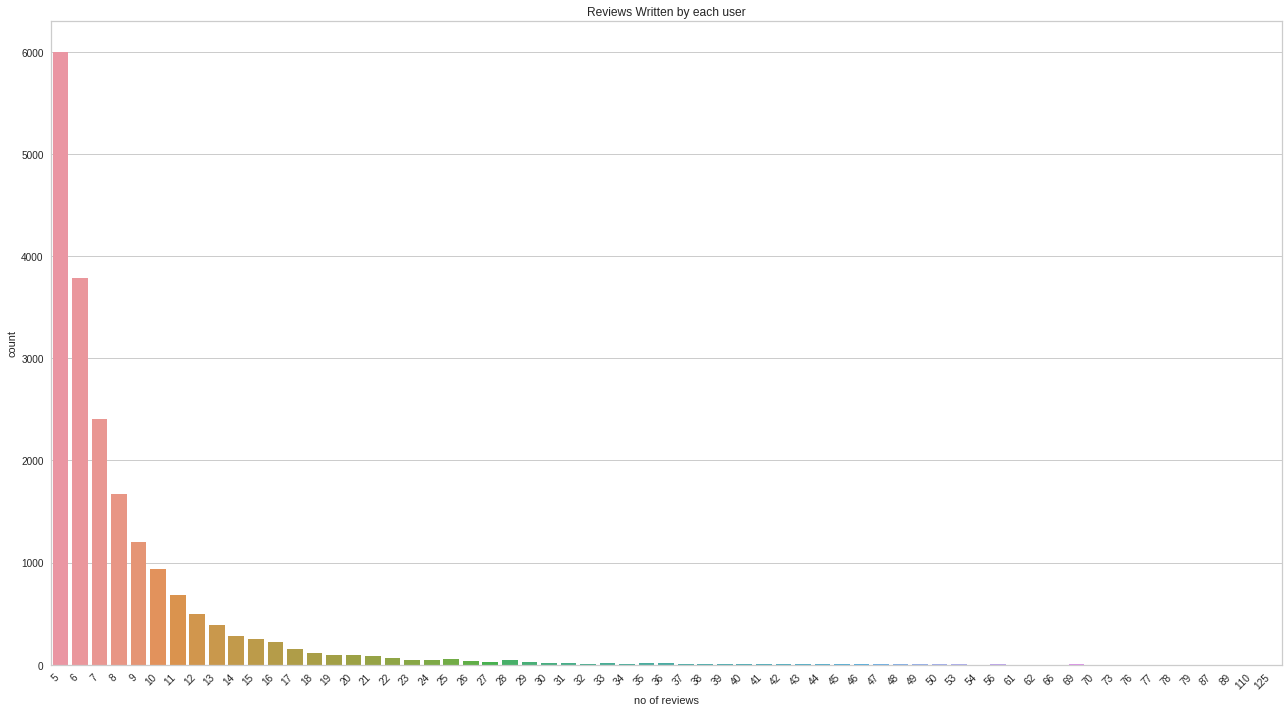

In [ ]:
#--- Distribution of number of reviews written by each user
f = plt.figure(figsize=(18,10))
userReviews = Baby[['reviewerID','asin']]
userReviews = userReviews.groupby(['reviewerID']).count().reset_index()
userReviews = userReviews.sort_values('asin',ascending = False)
userReviews = userReviews.rename(columns={'asin':'no of reviews'})
print(userReviews.head())

userReviews1 = userReviews.groupby('no of reviews')['reviewerID'].count().reset_index()
userReviews1 = userReviews1.rename(columns={'reviewerID':'count'})
print()
print(userReviews1.head())
userReviewChart = sns.barplot(x = 'no of reviews',y = 'count',data = userReviews1)
userReviewChart.set_title('Reviews Written by each user')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
f.tight_layout()


#The above code is referred from
#https://www.w3resource.com/pandas/dataframe/dataframe-head.php


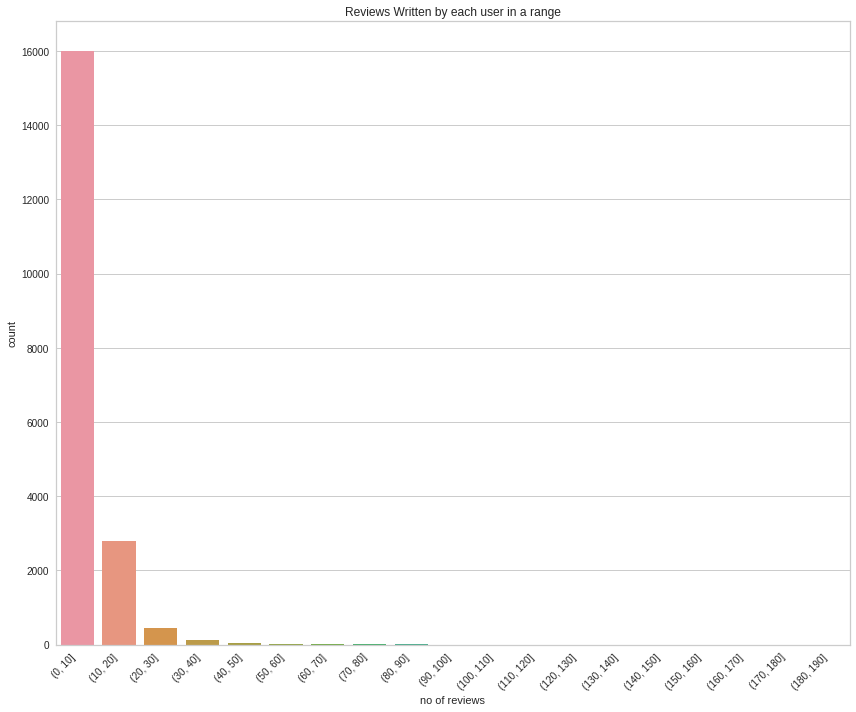

In [ ]:

f = plt.figure(figsize=(12,10))
userReviews2 = userReviews1.groupby(pd.cut(userReviews1['no of reviews'],np.arange(0,200,10))).sum()
userReviews2 = userReviews2.rename(columns={'no of reviews':'range of reveiws'})
userReviews2 = userReviews2.reset_index()
userReviewChart = sns.barplot(x='no of reviews',y='count',data=userReviews2)
userReviewChart.set_title('Reviews Written by each user in a range')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
f.tight_layout()

#--- The above code is referred from
#https://www.w3resource.com/pandas/dataframe/dataframe-head.php


In [ ]:
#--- Data Cleaning
BabyFinal = Baby[Baby['reviewerID'] == 'A1HK2FQW6KXQB2']

#--- Uncomment the code to display the data
#BabyFinal

In [ ]:
baby_meta.loc[baby_meta.asin.isin(BabyFinal.asin.values.tolist())]



#The above code is referred from
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#:~:text=Access%20a%20group%20of%20rows,used%20with%20a%20boolean%20array.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

,asin,description,categories,title,price,salesRank,related,brand
7,097293751X,Easily keep track of your baby's or child's da...,[[Baby]],"Baby Tracker&reg; - Daily Childcare Journal, S...",17.00,NaN,"{'also_bought': ['9729375011', 'B004FN1AE8', '...",Time Too
11472,B0013FGWD0,Recommended and Tested by Leading Pediatrician...,[[Baby]],"BreathableBaby Breathable Mesh Crib Liner, White",28.00,NaN,"{'also_bought': ['B002UD65XQ', 'B004044LD4', '...",BreathableBaby
14183,B001DKHPD6,"Ju Ju Be's Be All bag is smart, that sums it u...",[[Baby]],"Ju-Ju-Be Be All Diaper Bag, Lotus Lullaby",109.17,NaN,"{'also_bought': ['B001FWYGSE', 'B00B99RCXE', '...",Ju-Ju-Be
14635,B001F8TLLU,"A tiny bundle of joy, a big bundle of paperwor...",[[Baby]],"Baby Briefcase Baby Paperwork Organizer, Mint/...",29.95,NaN,"{'also_bought': ['B000V5KPZ4', '9729375011', '...",Baby Briefcase
30512,B004071ZOY,Mom and Dad are going fall for this terry-ific...,[[Baby]],"Baby Aspen Let The Fin Begin Terry Shark Robe,...",19.99,NaN,"{'also_bought': ['B00EWOISC2', '1452112517', '...",Baby Aspen


In [ ]:
#Deleting all the duplicates having the same userID, Profile, NameTime and Text all in the same column.
BabyFinal =  Baby.drop_duplicates(subset={"reviewerID","reviewerName","reviewTime","reviewText"},keep="first")
size_diff = BabyFinal['asin'].size/Baby['asin'].size
print("%.1f %% reduction in data after deleting duplicates"%((1-size_diff)*100))
print("Size of data",BabyFinal['asin'].size," rows ")

0.0 % reduction in data after deleting duplicates
Size of data 160792  rows 


In [ ]:
#Text Preprocessing

#--- HTML Tag Removal
import re #Regex (Regular Expr Operations)
#string = r"sdfsdfd" :- r is for raw string as Regex often uses \ backslashes(\w), so they are often raw strings(r’\d’)
########Function to remove html tags from data
def striphtml(data):
    p = re.compile('<.*?>')#Find this kind of pattern
    #print(p.findall(data))#List of strings which follow the regex pattern
    return p.sub('',data) #Substitute nothing at the place of strings which matched the patterns

#--- Punctuation removal
########Function to remove All the punctuations from the text
def strippunc(data):
    p = re.compile(r'[?|!|\'|"|#|.|,|)|(|\|/|~|%|*]')
    return p.sub('',data)

#--- StopWords

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = stopwords.words('english') #All the stopwords in English language
#excluding some useful words from stop words list as we doing sentiment analysis
excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop = [words for words in stop if words not in excluding]
print(stop)

from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english') #initialising the snowball stemmer
#print("Stem/Root words of the some of the words using SnowBall Stemmer:")
#print(snow.stem('tasty'))
#print(snow.stem('tasteful'))
#print(snow.stem('tastiest'))
#print(snow.stem('delicious'))
#print(snow.stem('amazing'))
#print(snow.stem('amaze'))
#print(snow.stem('initialize'))
#print(snow.stem('fabulous'))
#print(snow.stem('Honda City'))
#print(snow.stem('unpleasant'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',

In [ ]:
#pre-processing output for one Review
def preprocessText(text, stem=False):
  filtered_sentence = []
  final_string = []
  #print(text)
  text = striphtml(text) #--- remove HTML Tags
  text = strippunc(text) #--- remove Punctuation
  for w in text.split(): #--- isalpha() methods returns “True” if all characters in the string are alphabets, Otherwise, It returns “False”.
    if(w.isalpha() and (len(w) > 2)):  #--- Check is value is not numeric and has length > 2
      if(w.lower() not in stop):       #--- Check if it is a stopword
        if stem : 
          s = (snow.stem(w.lower())).encode('utf8') #--- Stemming the word using snowball stemmer
        else:
          s = (w.lower()).encode('utf8') #--- Stemming the word using snowball stemmer
        filtered_sentence.append(s)
      else:
        continue
    else:
      continue
  cleanedText = b" ".join(filtered_sentence) # string of cleaned words
  final_string.append(cleanedText)
  return final_string

print('---- Uncleaned Text ----')
print(BabyFinal.reviewText[0])
print('---- Cleaned Text ----')
print(preprocessText(BabyFinal.reviewText[0],True))
print()
print('---- Cleaned Text (without Stemming)----')
cleaned_text = []
for i in range(BabyFinal.shape[0]):
  cleaned_text.append(preprocessText(BabyFinal['reviewText'][i]))
BabyFinal['cleanedReview'] = cleaned_text


print("Preprocessing completed in ")

---- Uncleaned Text ----
Perfect for new parents. We were able to keep track of baby's feeding, sleep and diaper change schedule for the first two and a half months of her life. Made life easier when the doctor would ask questions about habits because we had it all right there!
---- Cleaned Text ----
[b'perfect new parent abl keep track babi feed sleep diaper chang schedul first two half month life made life easier doctor would ask question habit right']

---- Cleaned Text (without Stemming)----
Preprocessing completed in 


In [ ]:
Baby_main = Baby.copy(deep = True)

In [ ]:
#--- Uncomment the code to display the data
#BabyFinal

In [ ]:
helpful_votes = []
total_votes = []
for i in range(BabyFinal.shape[0]):
  helpful_votes.append(BabyFinal['helpful'][i][0])
  total_votes.append(BabyFinal['helpful'][i][1])
BabyFinal['helpfulVotes'] = helpful_votes
BabyFinal['totalVotes'] = total_votes

In [ ]:
#--- Uncomment the code to display the data
#BabyFinal

In [ ]:
Baby_filtered = BabyFinal.groupby('asin', as_index=False)['overall'].mean()

#--- Uncomment the code to display the data
#Baby_filtered

In [ ]:
asin_list = Baby_filtered['asin']

#--- Uncomment the code to display the data
#asin_list

In [ ]:
BabyFilteredFinal = BabyFinal[BabyFinal['asin'].isin(asin_list)]

#--- Uncomment the code to display the data
#BabyFilteredFinal

In [ ]:
Baby = BabyFilteredFinal

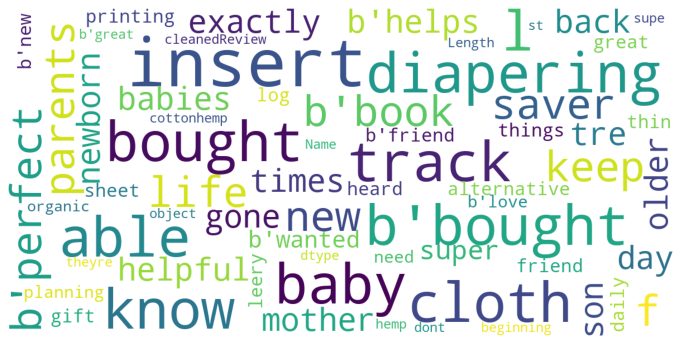



Word Cloud processing completed in 


In [ ]:
#--- WordCloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1).generate(str(data)) # chosen at random by flipping a coin; it was heads
  fig = plt.figure(1, figsize=(12, 10))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(Baby['cleanedReview'])
print()
print()
print("Word Cloud processing completed in ")


In [ ]:
# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 1
    #elif score <= -0.5:
    #    return 0
    else:
        return 0 
  
#The above code is referred from
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/#:~:text=Sentiment%20Analysis%20is%20the%20process,is%20positive%2C%20negative%20or%20neutral.  

In [ ]:
senti_score = []
cleaned_reviews = Baby['cleanedReview'].tolist()
for i in range(len(cleaned_reviews)):
  print(i)
  senti_score.append(sentimental_Score(cleaned_reviews[i][0].decode("utf-8") ))
Baby['Sentiment'] = senti_score

Streaming output truncated to the last 5000 lines.
155792
155793
155794
155795
155796
155797
155798
155799
155800
155801
155802
155803
155804
155805
155806
155807
155808
155809
155810
155811
155812
155813
155814
155815
155816
155817
155818
155819
155820
155821
155822
155823
155824
155825
155826
155827
155828
155829
155830
155831
155832
155833
155834
155835
155836
155837
155838
155839
155840
155841
155842
155843
155844
155845
155846
155847
155848
155849
155850
155851
155852
155853
155854
155855
155856
155857
155858
155859
155860
155861
155862
155863
155864
155865
155866
155867
155868
155869
155870
155871
155872
155873
155874
155875
155876
155877
155878
155879
155880
155881
155882
155883
155884
155885
155886
155887
155888
155889
155890
155891
155892
155893
155894
155895
155896
155897
155898
155899
155900
155901
155902
155903
155904
155905
155906
155907
155908
155909
155910
155911
155912
155913
155914
155915
155916
155917
155918
155919
155920
155921
155922
155923
155924
155925
155926
1559

In [ ]:
#--- Uncomment the code to display the data
#Baby

In [ ]:
Baby_full_dataset = Baby

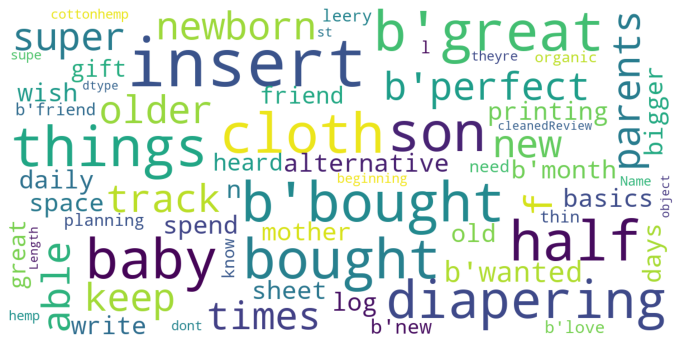


Word Cloud processing completed in 


In [ ]:
positive_data = Baby_full_dataset[Baby_full_dataset.Sentiment == 1.0]
show_wordcloud(positive_data['cleanedReview'])
print()
print("Word Cloud processing completed in ")

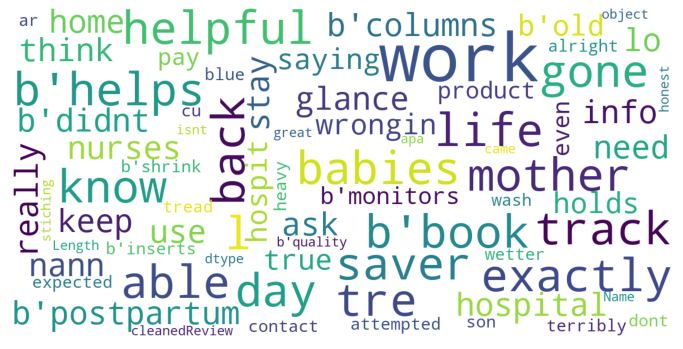


Word Cloud processing completed in 


In [ ]:
negative_data = Baby_full_dataset[Baby_full_dataset.Sentiment == 0.0]
show_wordcloud(negative_data['cleanedReview'])
print()
print("Word Cloud processing completed in ")

In [ ]:
#--- Uncomment the code to display the data
#negative_data

In [ ]:
Sentiment_Data = pd.concat([positive_data, negative_data])
Sentiment_Data.to_csv('/content/drive/My Drive/Amazon_Review_recommendation/Baby.csv',index=False)

#--- Uncomment the code to display the data
#Sentiment_Data

In [ ]:
Baby = pd.read_csv('/content/drive/My Drive/Amazon_Review_recommendation/Baby.csv')
Baby.head(5)
from sklearn.feature_extraction.text import TfidfVectorizer
review = []
cleaned_reviews = Baby['cleanedReview'].tolist()
for i in range(len(cleaned_reviews)):
  #print(i)
  review.append(cleaned_reviews[i][3:-2])
#review = Baby['cleanedReview'].tolist()
Baby['Clean_Review'] = review
tfidf_vect = TfidfVectorizer(ngram_range=(1,5),stop_words='english', max_features=300)
tfidf_vect.fit(review)
titleFeatures= tfidf_vect.transform(review).toarray()
labels= Baby['Sentiment'].tolist()
X_train, X_test, y_train, y_test = train_test_split( titleFeatures, labels, test_size=0.2, shuffle= True,random_state=42)


In [ ]:

#--- Uncomment the code to display the data
#Baby

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import log_loss
from matplotlib import pyplot
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DecisionTree Classifier :train set
DecisionTree Classifier :Confusion Matrix:  [[ 27616      8]
 [    60 100949]]
DecisionTree Classifier :Accuracy :  99.9471364268889
DecisionTree Classifier :Test set
DecisionTree Classifier :Confusion Matrix:  [[ 3304  3690]
 [ 3425 21740]]
DecisionTree Classifier :Accuracy :  77.87555583195996


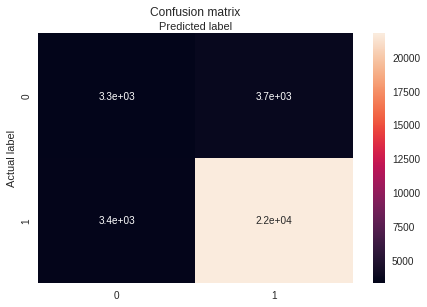

AUC: 0.67


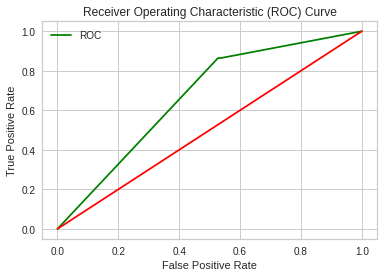

              precision    recall  f1-score   support

           0       0.49      0.47      0.48      6994
           1       0.85      0.86      0.86     25165

    accuracy                           0.78     32159
   macro avg       0.67      0.67      0.67     32159
weighted avg       0.78      0.78      0.78     32159



In [ ]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='-')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("DecisionTree Classifier :train set")
y_pred = dt.predict(X_train)
#pred=vc.predict_proba(X_test)   
print("DecisionTree Classifier :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
print ("DecisionTree Classifier :Accuracy : ", accuracy_score(y_train,y_pred)*100)
print("DecisionTree Classifier :Test set")
y_pred = dt.predict(X_test)
print("DecisionTree Classifier :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("DecisionTree Classifier :Accuracy : ", accuracy_score(y_test,y_pred)*100)
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#ROC_AUC curve
probs = dt.predict_proba(X_test) 
probs = probs[:, 1]  
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)
le = preprocessing.LabelEncoder()
y_test1=le.fit_transform(y_test)
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plot_roc_curve(fpr, tpr)
print(classification_report(y_test, y_pred))

AdaBoost Classifier :train set
AdaBoost Classifier :Confusion Matrix:  [[13226 14398]
 [ 6072 94937]]
AdaBoost Classifier :Accuracy :  84.08650968258534
AdaBoost Classifier :Test set
AdaBoost Classifier :Confusion Matrix:  [[ 3286  3708]
 [ 1479 23686]]
AdaBoost Classifier :Accuracy :  83.87076712584347


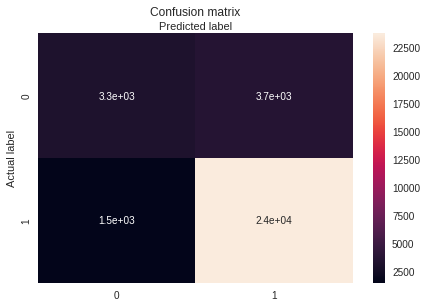

AUC: 0.86


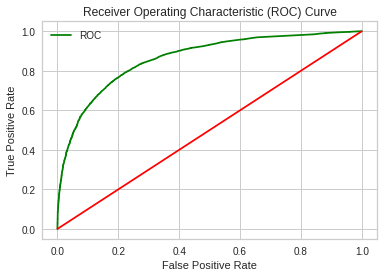

              precision    recall  f1-score   support

           0       0.69      0.47      0.56      6994
           1       0.86      0.94      0.90     25165

    accuracy                           0.84     32159
   macro avg       0.78      0.71      0.73     32159
weighted avg       0.83      0.84      0.83     32159



In [ ]:
#AdaBoost
rf = AdaBoostClassifier()
rf.fit(X_train,y_train)
print("AdaBoost Classifier :train set")
y_pred = rf.predict(X_train)
#pred=vc.predict_proba(X_test)   
print("AdaBoost Classifier :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
print ("AdaBoost Classifier :Accuracy : ", accuracy_score(y_train,y_pred)*100)
print("AdaBoost Classifier :Test set")
y_pred = rf.predict(X_test)
print("AdaBoost Classifier :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("AdaBoost Classifier :Accuracy : ", accuracy_score(y_test,y_pred)*100)
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#ROC_AUC curve
probs = rf.predict_proba(X_test) 
probs = probs[:, 1]  
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)
le = preprocessing.LabelEncoder()
y_test1=le.fit_transform(y_test)
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plot_roc_curve(fpr, tpr)
print(classification_report(y_test, y_pred))

XGBClassifier Classifier :train set
XGBClassifier Classifier :Confusion Matrix:  [[ 9877 17747]
 [ 3273 97736]]
XGBClassifier Classifier :Accuracy :  83.65893666477498
XGBClassifier Classifier :Test set
XGBClassifier Classifier :Confusion Matrix:  [[ 2472  4522]
 [  805 24360]]
XGBClassifier Classifier :Accuracy :  83.43543020616313


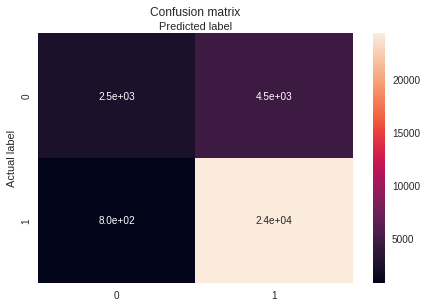

AUC: 0.85


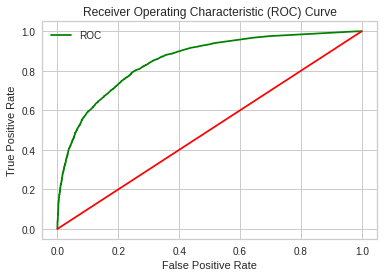

              precision    recall  f1-score   support

           0       0.75      0.35      0.48      6994
           1       0.84      0.97      0.90     25165

    accuracy                           0.83     32159
   macro avg       0.80      0.66      0.69     32159
weighted avg       0.82      0.83      0.81     32159



In [ ]:
#XGBoost
xg = XGBClassifier()
xg.fit(X_train,y_train)
print("XGBClassifier Classifier :train set")
y_pred = xg.predict(X_train)
#pred=vc.predict_proba(X_test)   
print("XGBClassifier Classifier :Confusion Matrix: ", confusion_matrix(y_train, y_pred))
print ("XGBClassifier Classifier :Accuracy : ", accuracy_score(y_train,y_pred)*100)
print("XGBClassifier Classifier :Test set")
y_pred = xg.predict(X_test)
print("XGBClassifier Classifier :Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("XGBClassifier Classifier :Accuracy : ", accuracy_score(y_test,y_pred)*100)
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#ROC_AUC curve
probs = xg.predict_proba(X_test) 
probs = probs[:, 1]  
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)
le = preprocessing.LabelEncoder()
y_test1=le.fit_transform(y_test)
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plot_roc_curve(fpr, tpr)
print(classification_report(y_test, y_pred))

In [ ]:
data_final = Baby

In [ ]:
data = data_final[['reviewerID',	'asin','overall']]

#--- Uncomment the code to display the data
#data

In [ ]:
#No of unique customers and products
print("Unique Customers: ",data.reviewerID.nunique())
print("Unique Products: ",data.asin.nunique())

Unique Customers:  19445
Unique Products:  7050


In [ ]:
#Popularity Based model
#Filling products which are not rated zero and taking pivot to categorize each user with product they rated
final_ratings_matrix = pd.pivot_table(data,index='reviewerID',columns='asin',values = 'overall').fillna(0)

In [ ]:
#Checking the density of rated products. User provided ratings to very less products or we can also say they didint bought 
#those products
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  160792
possible_num_of_ratings =  137087250
density: 0.12%


In [ ]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

reviewerID,A00097001C4CLB27DQV4U,A0067145DW5V5SRLSIPM,A01788862E45STS4C2ZRQ,A02155413BVL8D0G7X6DN,A022899328A0QROR32DCT,A02884503P7XBJGRVIVV5,A04588013IUFBSU7WNPZU,A05676601NFE7CQK17X7U,A06493912VQG7MLFQ8BMG,A0764543R3OVY4FERRXM,...,AZW4W0FSOMZ99,AZW9UD7Z7J0WL,AZWMJ41IZ8IUT,AZX1LTRNLSZ24,AZXEHGPNOO87I,AZXHT0CY57Y7F,AZXYMD0WNZVLE,AZYJE40XW6MFG,AZZ2YZ6EH9T62,AZZGEUC3LYIF3
asin,,,,,,,,,,,,,,,,,,,,,
097293751X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9729375011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IZQI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J3LL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00002JV9S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(data, test_size = 0.3, random_state=10)
train_data.head()

,reviewerID,asin,overall
57081,AG4Y017B621UQ,B002KCNEDG,5
37400,A3OXEP1DTGHBDI,B0016KV73W,5
3971,A2NN6IXMBLSHLD,B000063XV4,3
113890,A1FNXKSER9B0DU,B008W6XY8O,5
92405,A2EHLYWPCNJM07,B004TUTOLS,5


In [ ]:
#print(train_data.shape)
#print(test_data.shape)

In [ ]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('asin').agg({'reviewerID':'count','overall':'mean'}).reset_index()
train_data_grouped.rename(columns={'reviewerID':'count','overall':'mean'},inplace=True)
train_data_grouped.head()

,asin,count,mean
0,097293751X,11,4.181818
1,9729375011,27,4.777778
2,B00000IZQI,11,4.818182
3,B00000J3LL,5,4.600000
4,B00002JV9S,40,4.050000


In [ ]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['count'], ascending = 0) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['count'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,asin,count,mean,Rank
938,B000IDSLOG,561,4.278075,1.0
2459,B00295MQLU,462,4.588745,2.0
1431,B000YDDF6O,396,4.707071,3.0
303,B0000DEW8N,337,4.697329,4.0
2322,B001U9OUYC,324,4.611111,5.0


In [ ]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['asin'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [ ]:
find_recom = [1267,385,40]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: ", i)
    print("The products are most sold along with there mean rating:\n")
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId:  1267
The products are most sold along with there mean rating:

      Rank  asin  count      mean
938    1.0  1267    561  4.278075
2459   2.0  1267    462  4.588745
1431   3.0  1267    396  4.707071
303    4.0  1267    337  4.697329
2322   5.0  1267    324  4.611111


Here is the recommendation for the userId:  385
The products are most sold along with there mean rating:

      Rank  asin  count      mean
938    1.0   385    561  4.278075
2459   2.0   385    462  4.588745
1431   3.0   385    396  4.707071
303    4.0   385    337  4.697329
2322   5.0   385    324  4.611111


Here is the recommendation for the userId:  40
The products are most sold along with there mean rating:

      Rank  asin  count      mean
938    1.0    40    561  4.278075
2459   2.0    40    462  4.588745
1431   3.0    40    396  4.707071
303    4.0    40    337  4.697329
2322   5.0    40    324  4.611111




In [ ]:
#Collaborative Filtering using SVD
train_final_ratings_matrix = pd.pivot_table(train_data,index='reviewerID',columns='asin',values = 'overall').fillna(0)
test_final_ratings_matrix = pd.pivot_table(test_data,index='reviewerID',columns='asin',values = 'overall').fillna(0)

In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix['user_index'] = np.arange(0, train_final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix.head(10)

asin,097293751X,9729375011,B00000IZQI,B00000J3LL,B00002JV9S,B00002JXFI,B000034DCJ,B00003TKWE,B00003TL3H,B00003TL7P,...,B00J3TVRSS,B00J7ICKA4,B00J8B47ME,B00JB2PJ72,B00JEV5UI8,B00JLHWDO4,B00JLI73ZM,B00JRYRYS6,B00L13XFIE,user_index
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00097001C4CLB27DQV4U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A0067145DW5V5SRLSIPM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A01788862E45STS4C2ZRQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A02155413BVL8D0G7X6DN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A022899328A0QROR32DCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
A02884503P7XBJGRVIVV5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
A04588013IUFBSU7WNPZU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
A05676601NFE7CQK17X7U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
A06493912VQG7MLFQ8BMG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [ ]:
#Test Data
test_final_ratings_matrix['user_index'] = np.arange(0, test_final_ratings_matrix.shape[0], 1)
test_final_ratings_matrix.head()

asin,097293751X,9729375011,B00000IZQI,B00000J3LL,B00002JV9S,B00002JXFI,B00003TKWE,B00003TL3H,B00003TL7P,B00003XAKP,...,B00J3TVRSS,B00J7ICKA4,B00J8B47ME,B00JB2PJ72,B00JEV5UI8,B00JLHWDO4,B00JLI73ZM,B00JRYRYS6,B00L13XFIE,user_index
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00097001C4CLB27DQV4U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A0067145DW5V5SRLSIPM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A01788862E45STS4C2ZRQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A02155413BVL8D0G7X6DN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A022899328A0QROR32DCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
#Complete data
final_ratings_matrix.set_index(['user_index'], inplace=True)

#Train data
train_final_ratings_matrix.set_index(['user_index'], inplace=True)
train_final_ratings_matrix.head()

#Test Data
test_final_ratings_matrix.set_index(['user_index'], inplace=True)
test_final_ratings_matrix.head()

asin,097293751X,9729375011,B00000IZQI,B00000J3LL,B00002JV9S,B00002JXFI,B00003TKWE,B00003TL3H,B00003TL7P,B00003XAKP,...,B00J3EQ68E,B00J3TVRSS,B00J7ICKA4,B00J8B47ME,B00JB2PJ72,B00JEV5UI8,B00JLHWDO4,B00JLI73ZM,B00JRYRYS6,B00L13XFIE
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(train_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [ ]:
train_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
train_preds_df = pd.DataFrame(train_predicted_ratings, columns = train_final_ratings_matrix.columns)

#--- Uncomment the code to display the data
#train_preds_df.head()

In [ ]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = final_ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings','user_predictions']
    possitive=[]
    negative=[]
    #temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    temp = temp[['user_predictions']]
    for i in range(num_recommendations):
      prod = temp.index[i]
      df = Baby[Baby.asin == str(prod)]
      review = []
      review = df['Clean_Review'].tolist()
      tfidf_vect = TfidfVectorizer(ngram_range=(1,5),stop_words='english', max_features=300)
      tfidf_vect.fit(review)
      titleFeatures= tfidf_vect.transform(review).toarray()
      labels= df['Sentiment'].tolist()
      pred = rf.predict(titleFeatures)
      pred = pred.tolist() 
      possitive.append(pred.count(1))
      negative.append(pred.count(0))   
    temp = temp.head(num_recommendations)
    temp['Possitive Reviews'] = possitive
    temp['Negative Reviews'] = negative
    print(temp.head(num_recommendations))

In [ ]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 3
num_recommendations = 5
recommend_items(userID, train_final_ratings_matrix, train_preds_df, num_recommendations)


Below are the recommended items for user(user_id = 3):

                   user_predictions  Possitive Reviews  Negative Reviews
Recommended Items                                                       
B0042D69WY                 0.156740                322                34
B000GJIE4E                 0.112765                258                73
B000LXQVA4                 0.073756                350                59
B001BMWABI                 0.056424                220                44
B001QC3CKG                 0.053973                138                24


In [ ]:
# Average ACTUAL rating for each item
test_final_ratings_matrix.mean().head()

asin
097293751X    0.001591
9729375011    0.002160
B00000IZQI    0.000284
B00000J3LL    0.000739
B00002JV9S    0.004320
dtype: float64

In [ ]:
# Singular Value Decomposition
U_t, sigma_t, Vt_t = svds(test_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma_t = np.diag(sigma_t)

In [ ]:
test_predicted_ratings = np.dot(np.dot(U_t, sigma_t), Vt_t) 

# Predicted ratings
test_preds_df = pd.DataFrame(test_predicted_ratings, columns = test_final_ratings_matrix.columns)
test_preds_df.head()

asin,097293751X,9729375011,B00000IZQI,B00000J3LL,B00002JV9S,B00002JXFI,B00003TKWE,B00003TL3H,B00003TL7P,B00003XAKP,...,B00J3EQ68E,B00J3TVRSS,B00J7ICKA4,B00J8B47ME,B00JB2PJ72,B00JEV5UI8,B00JLHWDO4,B00JLI73ZM,B00JRYRYS6,B00L13XFIE
0,0.000009,0.000015,-2.623924e-08,2.379266e-07,0.000018,0.000012,0.000019,3.597457e-23,0.000035,0.000013,...,0.000006,0.000003,0.000003,0.000001,3.451666e-07,1.550402e-07,3.810222e-07,3.310584e-07,0.000003,0.000005
1,0.001180,0.002144,-1.187114e-06,1.192569e-05,0.002384,0.000739,0.002459,2.098011e-19,0.004374,0.001812,...,0.000856,0.000341,0.000345,0.000136,4.675252e-05,2.043677e-05,4.548725e-05,4.820753e-05,0.000390,0.000664
2,0.000165,0.000390,-4.319311e-07,3.214393e-06,0.000267,0.000146,0.000166,-6.620952e-19,0.000556,0.000179,...,0.000132,0.000050,0.000049,0.000017,4.794840e-06,2.542451e-06,5.515986e-06,1.363475e-05,0.000058,0.000103
3,0.000375,0.000633,-7.509391e-07,7.196528e-06,0.000740,0.000367,0.000688,-1.286611e-19,0.001373,0.000636,...,0.000298,0.000110,0.000107,0.000042,1.379901e-05,6.595948e-06,1.546941e-05,1.758925e-05,0.000124,0.000212
4,0.000012,0.000019,-2.833302e-08,3.245746e-07,0.000023,0.000015,0.000036,-1.311650e-20,0.000049,0.000015,...,0.000012,0.000003,0.000003,0.000001,4.890341e-07,1.948191e-07,6.063875e-07,6.430922e-07,0.000004,0.000007


In [ ]:
# Average PREDICTED rating for each item
test_preds_df.mean().head()

asin
097293751X    5.870468e-04
9729375011    1.351028e-03
B00000IZQI    3.941876e-07
B00000J3LL    1.532857e-05
B00002JV9S    1.164656e-03
dtype: float64

In [ ]:
rmse_df = pd.concat([test_final_ratings_matrix.mean(), test_preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(6729, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
asin,,,
097293751X,0.001591,5.870468e-04,0
9729375011,0.002160,1.351028e-03,1
B00000IZQI,0.000284,3.941876e-07,2
B00000J3LL,0.000739,1.532857e-05,3
B00002JV9S,0.004320,1.164656e-03,4


In [ ]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.00171 



In [ ]:
# Average ACTUAL rating for each item
test_final_ratings_matrix.mean().head()

asin
097293751X    0.001591
9729375011    0.002160
B00000IZQI    0.000284
B00000J3LL    0.000739
B00002JV9S    0.004320
dtype: float64

In [ ]:
# Singular Value Decomposition
U, sigma, Vt = svds(final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [ ]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(predicted_ratings, columns = final_ratings_matrix.columns)

In [ ]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 1267
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 1267):

                   user_predictions  Possitive Reviews  Negative Reviews
Recommended Items                                                       
B0000DEW8N                 0.498759                408                89
B0042D69WY                 0.371433                322                34
B000067EH7                 0.294522                268                29
B0045I6IA4                 0.178705                221                99
B000I2Q0F4                 0.167226                239                56


In [ ]:
userID = 385
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 385):

                   user_predictions  Possitive Reviews  Negative Reviews
Recommended Items                                                       
B0042D69WY                 0.458672                322                34
B0045I6IA4                 0.352405                221                99
B000S9RF4M                 0.342613                185               139
B000I2Q0F4                 0.313609                239                56
B000067EH7                 0.274027                268                29
